# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 619


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+"appid="+weather_api_key+"&q="+city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try: 
        response=requests.get(city_url)
        
        # Parse the JSON and retrieve data
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | las khorey
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | arkhangel'sk
Processing Record 5 of Set 1 | puerto natales
Processing Record 6 of Set 1 | georgetown
Processing Record 7 of Set 1 | wasselonne
Processing Record 8 of Set 1 | isafjordur
Processing Record 9 of Set 1 | laguna
Processing Record 10 of Set 1 | manicore
Processing Record 11 of Set 1 | taiohae
City not found. Skipping...
Processing Record 12 of Set 1 | ust-nera
Processing Record 13 of Set 1 | cargados carajos
City not found. Skipping...
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | dhidhdhoo
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | arteche
Processing Record 18 of Set 1 | phang nga
Processing Record 19 of Set 1 | smithers
Processing Record 20 of Set 1 | dawei
Processing Record 21 of Set 1 | lihue
Pro

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          598
Lat           598
Lng           598
Max Temp      598
Humidity      598
Cloudiness    598
Wind Speed    598
Country       598
Date          598
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,298.14,73,98,1.88,PN,1706989348
1,las khorey,11.1595,48.1967,298.35,76,0,3.43,SO,1706989348
2,waitangi,-43.9535,-176.5597,289.16,84,52,0.45,NZ,1706989348
3,arkhangel'sk,64.5401,40.5433,267.21,93,100,4.00,RU,1706989348
4,puerto natales,-51.7236,-72.4875,289.40,36,100,10.29,CL,1706989349


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,298.14,73,98,1.88,PN,1706989348
1,las khorey,11.1595,48.1967,298.35,76,0,3.43,SO,1706989348
2,waitangi,-43.9535,-176.5597,289.16,84,52,0.45,NZ,1706989348
3,arkhangel'sk,64.5401,40.5433,267.21,93,100,4.00,RU,1706989348
4,puerto natales,-51.7236,-72.4875,289.40,36,100,10.29,CL,1706989349


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

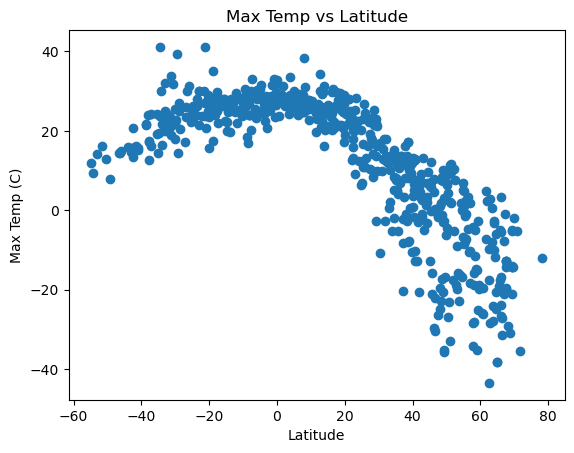

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp']-273.15)

# Incorporate the other graph properties
plt.title("Max Temp vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

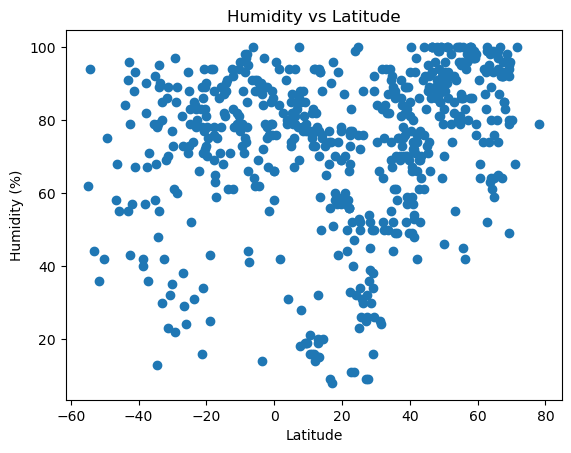

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title("Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

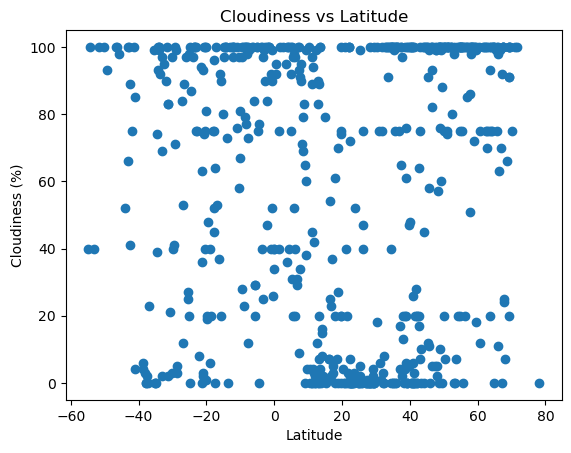

In [17]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title("Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

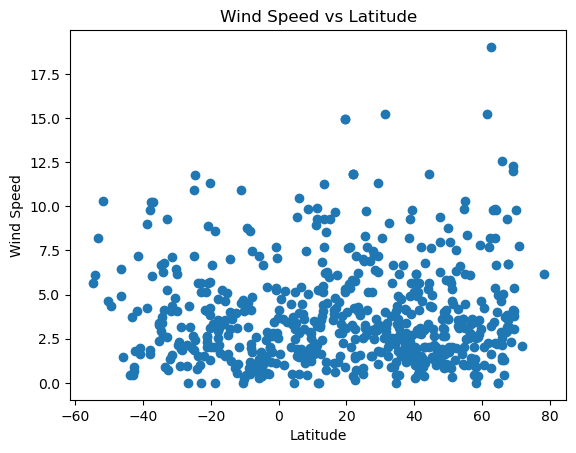

In [19]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title("Wind Speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [67]:
# Define a function to create Linear Regression plots

#x,y are column names of the data frame
def LinRegPlots(x,y,df):
    x_values = df[x]
    y_values = df[y]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(2.8,2.8),fontsize=10,color="red")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(line_eq)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()
    return None
    

In [68]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,las khorey,11.1595,48.1967,298.35,76,0,3.43,SO,1706989348
3,arkhangel'sk,64.5401,40.5433,267.21,93,100,4.00,RU,1706989348
5,georgetown,5.4112,100.3354,301.12,79,20,1.54,MY,1706989212
6,wasselonne,48.6372,7.4473,281.57,81,100,3.09,FR,1706989349
7,isafjordur,66.0755,-23.1240,267.70,94,98,5.05,IS,1706989349


In [69]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,298.14,73,98,1.88,PN,1706989348
2,waitangi,-43.9535,-176.5597,289.16,84,52,0.45,NZ,1706989348
4,puerto natales,-51.7236,-72.4875,289.40,36,100,10.29,CL,1706989349
9,manicore,-5.8092,-61.3003,301.21,88,29,1.36,BR,1706989350
11,port-aux-francais,-49.3500,70.2167,280.97,75,93,4.33,TF,1706989350


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7272436723036633


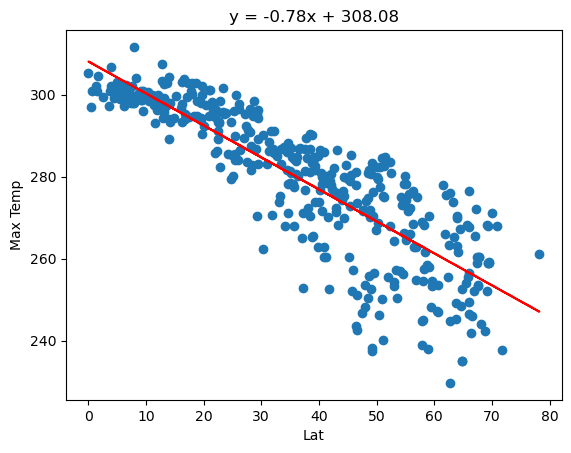

In [70]:
# Linear regression on Northern Hemisphere
LinRegPlots("Lat","Max Temp",northern_hemi_df)

The r-squared is: 0.3381275755378687


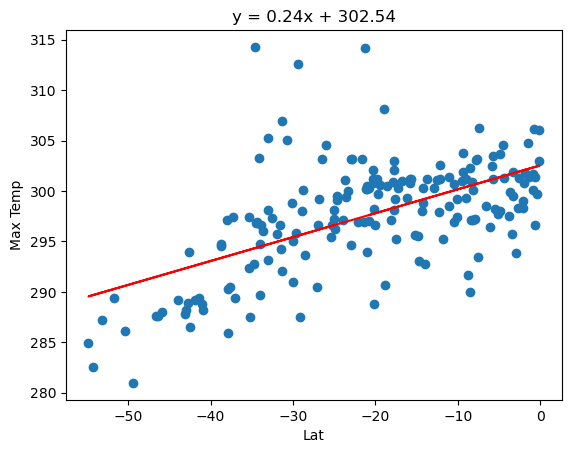

In [71]:
# Linear regression on Southern Hemisphere
LinRegPlots("Lat","Max Temp",southern_hemi_df)

**Discussion about the linear relationship:** Temperature vs latitude has a seemingly negative linear relationship in the northern_hemi_df dataframe. This makes sense because the temperature decreases as we move further away from the equator. In the southern_hemi_df frame, the latitudes are decreasing as the temperatures are decreasing. Hence we observe a positive slope for the linear regression line.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.14888752575215


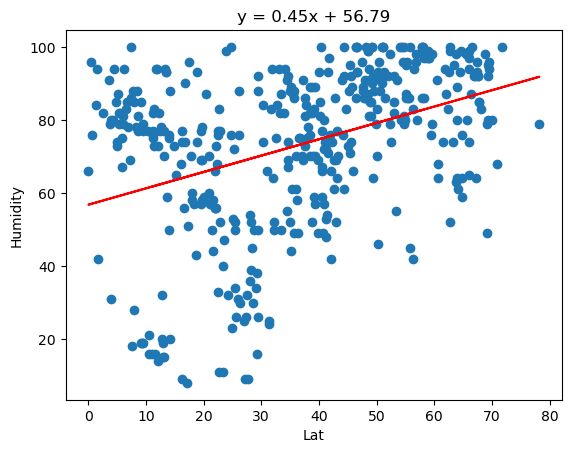

In [72]:
# Northern Hemisphere
LinRegPlots("Lat","Humidity",northern_hemi_df)

The r-squared is: 0.07155057696457458


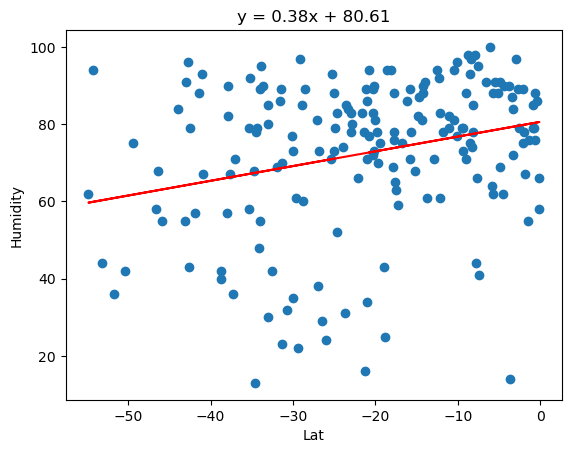

In [73]:
# Southern Hemisphere
LinRegPlots("Lat","Humidity",southern_hemi_df)

**Discussion about the linear relationship:** In both datasets we observe a slight positive relationship between humidity and latitude. Our low correlation values indicate the linear relationship is not very strong.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.08698582816759358


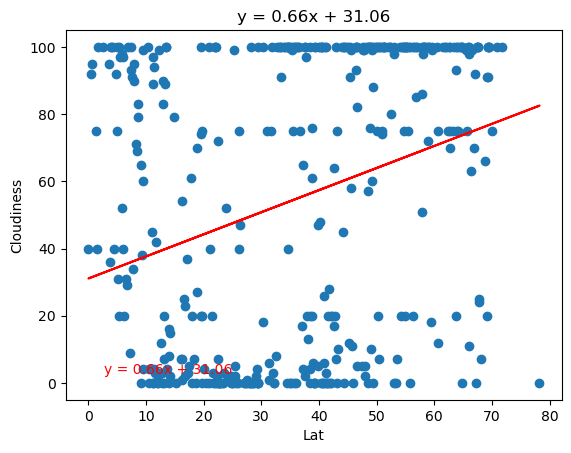

In [74]:
# Northern Hemisphere
LinRegPlots("Lat","Cloudiness",northern_hemi_df)

The r-squared is: 0.02108659574156812


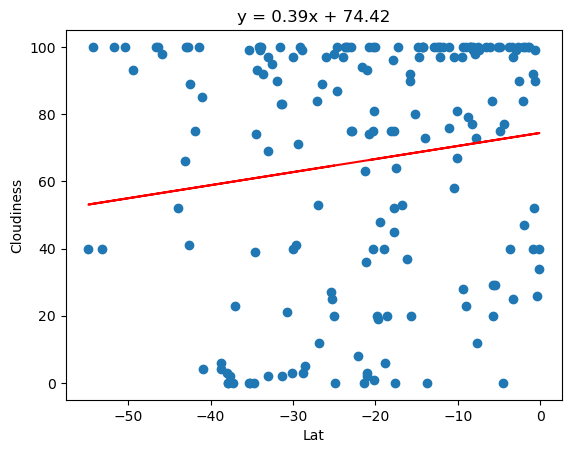

In [75]:
# Southern Hemisphere
LinRegPlots("Lat","Cloudiness",southern_hemi_df)

**Discussion about the linear relationship:** Based on low r squared values, we conclude that there is not a strong linear relationship between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0002769111022656588


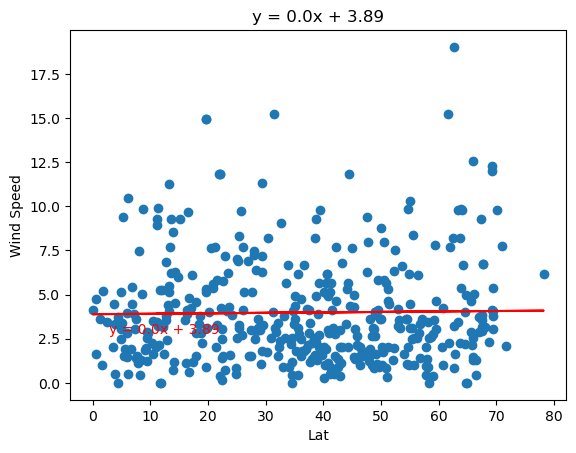

In [76]:
# Northern Hemisphere
LinRegPlots("Lat","Wind Speed",northern_hemi_df)

The r-squared is: 0.04410536413791926


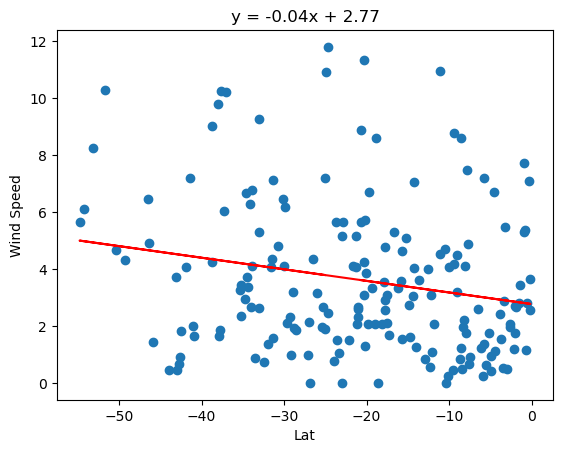

In [77]:
# Southern Hemisphere
LinRegPlots("Lat","Wind Speed",southern_hemi_df)

**Discussion about the linear relationship:** A linear relationship between wind speed and latitude does not exist.